
Programming Fundamentals
============================

In this notebook different plots and visualizations will be displayed using searborn, networkx, geoplotlib and matplotlib searborn libraries.  

### Exercice 1 (SEABORN)

In 2016 the Olympic Games were held in Rio de Janeiro. Using the Rio2016 website, we have downloaded the file `athletes.csv` where we can see some data about the athletes.

**a)** Load the data into a pandas dataframe and visualize using seaborn:
* A histogram of the participants' height. (using [`distplot`](https://seaborn.pydata.org/generated/seaborn.distplot.html))
* A histogram of the participants' weight. (using [`distplot`](https://seaborn.pydata.org/generated/seaborn.distplot.html))
* A scatter plot with the height on one axis and the weight on the other. (using [`jointplot`](https://seaborn.pydata.org/generated/seaborn.jointplot.html))

Explain the information that can be obtain from the three graphs.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns # version 0.11.0
import warnings
warnings.filterwarnings('ignore')

<AxesSubplot:xlabel='weight(kg)', ylabel='Density'>

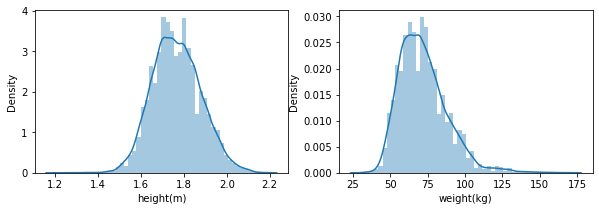

In [2]:
# Load .csv
df = pd.read_csv('data/athletes.csv')

# Histplots
fig, axes = plt.subplots(1, 2, figsize =(10,3))
sns.distplot(df['height'], axlabel='height(m)', ax=axes[0])
sns.distplot(df['weight'], axlabel='weight(kg)', ax=axes[1])

- Height:

Participant's height is between 129 cm and 218 following a bell-shaped density function, ie a virtually normal standard distribution. In addition, it has two peaks, one around 170 cm and another at 180 cm.

- Weight:

Weight values are between 31 and 170 kg and, similarly to the height, it also has a very similar distribution to the normal distribution. In this case, the values are less focused on the median, and the more frequent values tend to be smaller than the median. In addition, there are also two peaks, one around 65 kg and another over 75 kg.


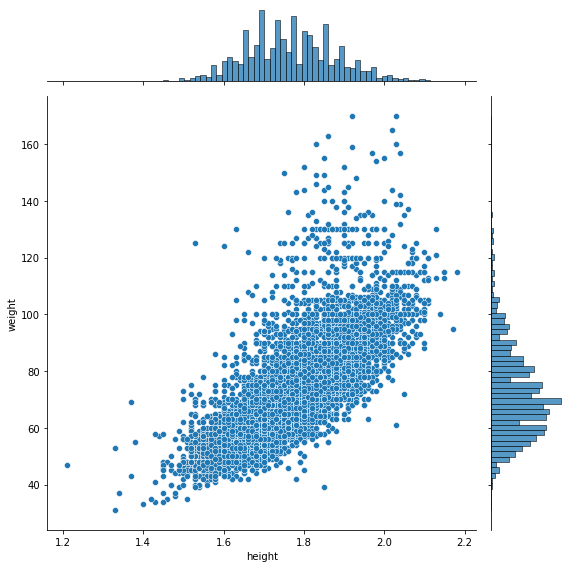

In [3]:
# Scatterplot
sns.jointplot(data=df, x='height', y='weight', height=8)

Observing the scatter plot, a correlation between the weight and the height features can be appreciated. Most of the points with low weight values also have low height values, and similarly, high weight values are usually associated with those high height values. Considering all the points, you can see how a very thick line is drawn that goes from the bottom left of the graph to the top-middle right, i.e. there is a positive correlation.

**b)** Graphic the scatter plot again, but now only displaying the athletes who have won one or more gold medals (use [`scatterplot`](https://seaborn.pydata.org/generated/seaborn.scatterplot.html)). Use different colors to represent the number of gold medals won (make sure that the colors are different enough).

In addition, draw the weight/height regression line for all the participants (with and without medals) using regplot. What conclusions can be extracted?

(1.18, 2.2)

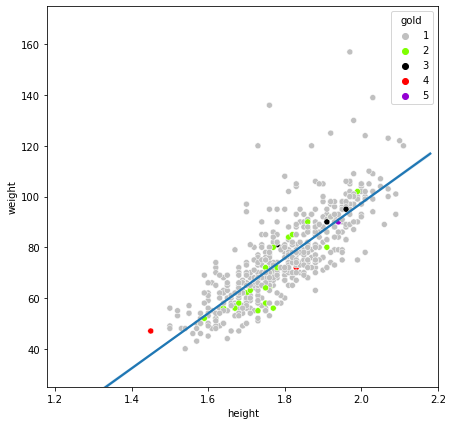

In [4]:
# Select athletes with gold medals
gold_athletes = df.loc[df.gold != 0]

# Set colors of the palette
colors = ["silver", 'chartreuse', 'k', 'r', 'darkviolet']

# Create Scatterplot
fig, ax = plt.subplots(figsize=(7,7))
sns.scatterplot(gold_athletes['height'], gold_athletes['weight'], 
                hue=gold_athletes['gold'], palette=colors, ax=ax)

# Regression line
sns.regplot(df['height'], df['weight'],scatter=False, ax=ax)
plt.ylim(25, 175)
plt.xlim(1.18, 2.2)

Athletes with more than one gold medal tend  to have values of weight and height close to the values of the regression line, although there are also some that deviate from them (outliers). Most of the points (with or without medals) are along the regression line, therefore, the number of gold medals is not correlated with height or weight. 

**c)** Create in the dataframe a new variable that shows the number of medals obtained (of any type), and repeat the previous graph, using the total number of medals as color. Is there any difference?

(1.18, 2.2)

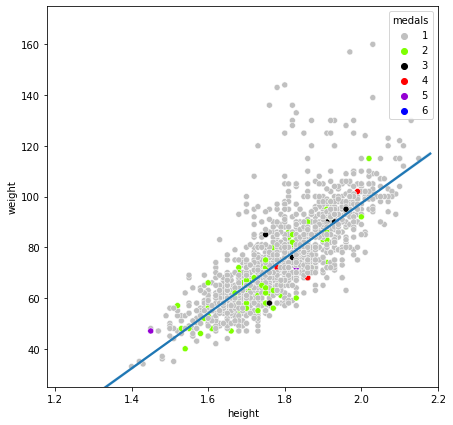

In [5]:
# New column "medals"
df['medals'] = df['gold'] + df['silver'] + df['bronze']
medal_athletes = df.loc[df.medals != 0]

# Set colors of the palette
colors = ["silver", 'chartreuse', 'k', 'r', 'darkviolet', 'blue']

# Scatterplot
fig, ax = plt.subplots(figsize=(7,7))
sns.scatterplot(medal_athletes['height'], medal_athletes['weight'], 
                hue=medal_athletes['medals'], palette=colors, ax=ax)

# Regression line
sns.regplot(df['height'], df['weight'],scatter=False, ax=ax)
plt.ylim(25, 175)
plt.xlim(1.18, 2.2)

Unlike gold medals athletes, the competitors with a number of medals greater than 1 tends to be more grouped in one area. Specifically it would be between height 1.6-1.85 m and weight 50-80 kg. Therefore, there could be a slight correlation between the number of medals and height and weight.

**d)** You have probably seen some correlations between the attributes. Use a heat map to view possible correlations between the numeric attributes. What information can we extract from the heat map?

<AxesSubplot:>

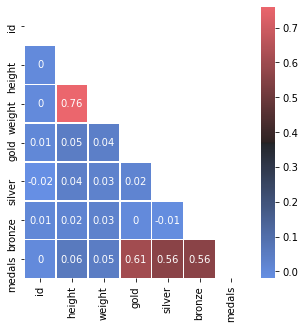

In [6]:
# Correlation table and mask to get the lower part
corr = df.corr().round(2)
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
#print(corr)

# Heatmap plot 
f,ax = plt.subplots(figsize=(5,5))
cmap = sns.diverging_palette(255,10,l=60, n=7, center ="dark", as_cmap=True)
sns.heatmap(corr, annot=True, mask=mask, cmap=cmap, linewidths=0.5, ax=ax)

The most obvious correlation is the one between height and weight, with a value of almost 0.8.

Also, as might be expected, the number of medals is positively related to the number of gold, silver and bronze medals, with values of 0.60, 0.56 and 0.56 respectively. Therefore, athletes with more medals, tend to have more gold than silver and bronze medals.

Finally, the correlation of the number of medals with the height and weight variables is around 0.05. Thus, although they are not zeros, such low values cannot be considered as a correlation.

**(OPTIONAL)** In the histograms of both weight and height (section A) there are double peaks. Display density distribution graphs for men and women separately for both characteristics. Is this the explanation for the double peak? 

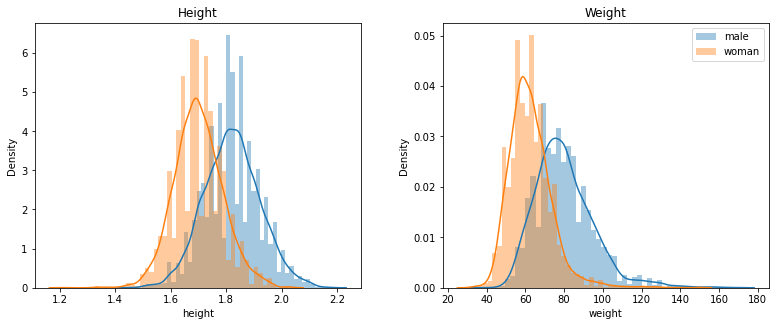

In [7]:
# Select each population
df_male = df.loc[df.sex == "male"]
df_female = df.loc[df.sex == "female"]

# Plot both populations' weight and height 
fig, axes = plt.subplots(nrows=1, ncols=2, figsize =(12,4))

axes = axes.flatten()

sns.distplot(df_male['height'], axlabel='height(m)', ax=axes[0])
sns.distplot(df_female['height'], ax=axes[0])

sns.distplot(df_male['weight'], axlabel='weight(kg)', ax=axes[1], label="male")
sns.distplot(df_female['weight'], ax=axes[1], label="woman")

axes[0].title.set_text('Height')
axes[1].title.set_text('Weight')
axes[1].legend()

plt.subplots_adjust(top=0.92, bottom=0, left=0.10, right=0.95, hspace=0.4,
                    wspace=0.25)

Yes, separating these data taking into account the sex of athletes, we can see how both height and weight are different for men and women athletes. Therefore, it is the reason for the double peaks seen in the first section.

### Exercice 2 (NETWORKX)


In 1992, coinciding with the Barcelona Olympics Games, the high-speed line between Madrid and Seville (Spain) was inaugurated under the name of AVE (Alta Velocidad Española). On this first line, which used Alstom's 100 series trains, the maximum speed could reach 300km/h. Since then, the lines, stations and maximum speed have been increasing.

**a)** In the file `Ave.csv` we can find a list with the AVE origin and end stations. In this exercise we ask you to create a graph of the stations.

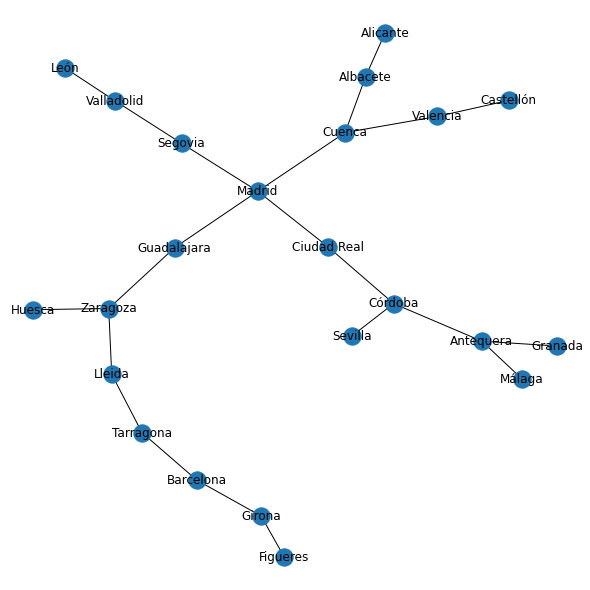

In [8]:
import networkx as nx

# Open .csv
df = pd.read_csv('data/Ave.csv', sep=";")

# Create graph and add at the same time edges and nodes
G = nx.Graph()
for i, row in df.iterrows():
    origen, final = row[0], row[1]
    G.add_edge(origen, final)

# Plot graph with labels
plt.figure(1, figsize=(8, 8))
nx.draw(G, with_labels=True)

**b)** Generate a new graph display, in which the nodes have a proportional size to the stations' city populations, and the edges have a length proportional to the distance between the linked stations. To do this, you can load the auxiliary data from the files `Ave_population.csv` (which contains the population of each city) and` Ave_distance.csv` (which contains the distances between stations).


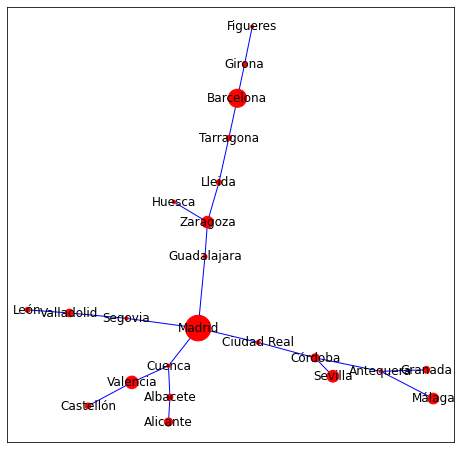

In [9]:
# Open .csv
df_pop = pd.read_csv('data/Ave_population.csv', encoding='iso-8859-14', sep=";")
df_dist = pd.read_csv('data/Ave_distance.csv', encoding='iso-8859-14', sep=";")

# Create graph
G = nx.Graph()

# Add nodes with the attribute population
for i, row in df_pop.iterrows():
    city, popu = row[0], row[1]
    G.add_node(city, node_size=popu)

# Add edges with the attribute length
for i, row in df_dist.iterrows():
    origen, final, dist = row[0], row[1], row[2]
    G.add_edge(origen, final, length=dist)

# Calculate nodes positions
graph_pos = nx.spring_layout(G, weight='length', iterations=1000)

# Draw graph
plt.figure(1, figsize=(8, 8))
nx.draw_networkx_nodes(G, graph_pos, node_size= df_pop['Poblacion']/5000,
                       node_color='red', alpha=1)
nx.draw_networkx_edges(G, graph_pos, edge_color='blue', alpha=1)
a = nx.draw_networkx_labels(G, graph_pos, font_size=12)

**c)** Calculate the route between Girona and Seville using the networkX tools, and show it.

In [10]:
# Getting shortestpaths
path = list(nx.shortest_simple_paths(G, source="Girona", target="Sevilla"))
print("Route from Girona to Sevilla: \n{}".format(path[0]))

Route from Girona to Sevilla: 
['Girona', 'Barcelona', 'Tarragona', 'Lleida', 'Zaragoza', 'Guadalajara', 'Madrid', 'Ciudad Real', 'Córdoba', 'Sevilla']


**(OPTIONAL)** Show the name of the stations that are located at the end of the line using the functions provided by networkx.

In [11]:
print("Final Stations:")

# Getting final stations
n = nx.degree(G)
for i in n:
    if i[1] == 1:
        print("  -" + i[0])

Final Stations:
  -Alicante
  -Castellón
  -Figueres
  -Granada
  -Huesca
  -León
  -Málaga
  -Sevilla


**(OPTIONAL)** Add a new edge between "Tarragona" and "Castellón" with a lenght of 186Km. Show the graph and calculate the possible routes between "Barcelona" and "Castellón" indicating the distance of each route.

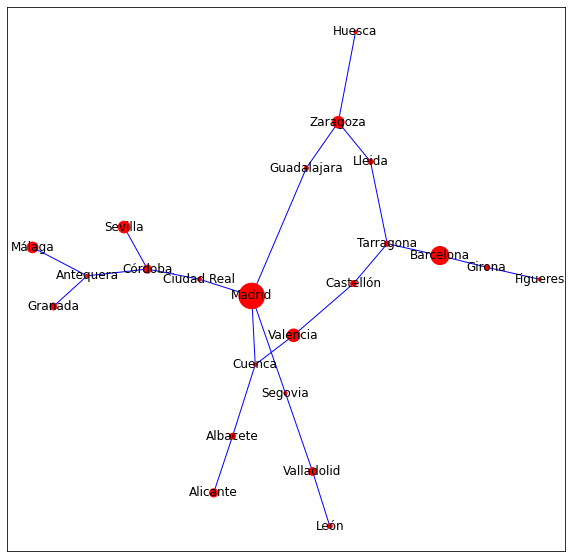

In [12]:
# Add edge
G.add_edge("Tarragona", "Castellón", length=186)

# Calculate node positions
graph_pos = nx.spring_layout(G, weight='length')

# Draw graph
plt.figure(1, figsize=(10, 10))
nx.draw_networkx_nodes(G, graph_pos, node_size= df_pop['Poblacion']/5000,
                       node_color='red', alpha=1)
nx.draw_networkx_edges(G, graph_pos, edge_color='blue', alpha=1)
a = nx.draw_networkx_labels(G, graph_pos, font_size=12)

In [13]:
# Function to sum the Km of a path
def sum_km(trip):
    
    # Variable to sum km
    count = 0
    
    # Iterate over the stations
    for i in range(len(trip)):
        
        if i < len(trip)-1:
            
            # Extract and sum attribute length to count
            for start, end, dist in G.edges.data():
                if ((trip[i] == start) | (trip[i] == end)) & \
                   ((trip[i+1] == start) | (trip[i+1] == end)):
                    
                    count += dist['length']
    
    result = str(trip) + ": "+  str(count) + " km"
    
    return result

In [14]:
# Get possible paths from Barcelona to Castellón
path = list(nx.all_simple_paths(G, source="Barcelona", target="Castellón"))
long_trip = path[0]
short_trip = path[1]

# Compute km of each path
print("Long trip:")
print(sum_km(long_trip))
print("\nShort trip:")
print(sum_km(short_trip))

Long trip:
['Barcelona', 'Tarragona', 'Lleida', 'Zaragoza', 'Guadalajara', 'Madrid', 'Cuenca', 'Valencia', 'Castellón']: 1111 km

Short trip:
['Barcelona', 'Tarragona', 'Castellón']: 286 km



### Exercice 3 (GEOPLOTLIB)

Throughout history, Olympic Games have been held in multiple locations around the world. In this exercise we will try to visualize this distribution on a map.

**a)** In order to make a visualization of the games' geographical locations, create a a new dataframe with the following columns: year, city, country, population, continent, lat, lon joining the `worldcities.csv` and `olimpics.csv` files.

In [15]:
# Open .csv files
df_cities = pd.read_csv('data/worldcities.csv')
df_olimpics = pd.read_csv('data/olimpics.csv', sep=";")

# Add year, city and country
df_final = df_olimpics.loc[:,'year':'country']

# Add population
population = df_cities.loc[:,['city', 'country', 'population']]
df_final = pd.merge(left=df_final, right=population, 
                    left_on=['city', 'country'], right_on=['city', 'country'])

# Add continent
df_final['continent'] = df_olimpics.loc[:,'continent']

# Add lat and lon
lat_long = df_cities.loc[:,['city','country', 'lat', 'lon']]
df_final = pd.merge(left=df_final, right=lat_long, 
                    left_on=['city', 'country'], right_on=['city', 'country'])


print("Rows in df_final: {}".format(len(df_final)))
df_final.head(2)

Rows in df_final: 34


,year,city,country,population,continent,lat,lon
0,1896,Athens,Greece,664046.0,Europe,37.9794,23.7161
1,2004,Athens,Greece,664046.0,Europe,37.9794,23.7161


**b)** Show the Olympic Games locations in the worldmap using the geoplotlib library.

In [27]:
import geoplotlib

df_data = df_final.loc[:,['lat','lon', 'city']]
geoplotlib.dot(df_data, point_size=5)

geoplotlib.show()

<div style="width: 100%; clear: both;">
    <div style="float: left;">
       <img src="map1.png", align="left">
    </div>
</div>

**c)** There are some cities that have the Olympic Games several times. In this graphic you have to:
* Change the color of the dots according to the number of times that city has been the location of the Olympic Games.
* Add a label with the number of times next to the dot. 

In [26]:
from geoplotlib.layers import LabelsLayer


# Create counts column 
counts = df_final['city'].value_counts().rename_axis('city').reset_index(name='counts')

# Merge counts column
df_data = df_final.loc[:,['lat','lon', 'city']].drop_duplicates()
df_count = pd.merge(left=df_data, right=counts, left_on=['city'], right_on=['city'])

# Get colors
colors = ['red', 'blue', 'black', 'green']

# Add dots with different colors
max_count = max(df_count['counts'])
for times, color in zip(range(1, max_count+1),colors):
    group = df_count.loc[df_count['counts'] == times, ['counts','lat', 'lon']]
    geoplotlib.dot(group, point_size=5, color=color)

# Add labels
df_count['counts'] = df_count['counts'].apply(str)
geoplotlib.labels(data=df_count, label_column='counts',
                  color=[0,0,255,255], font_size=18)

# Show plot
geoplotlib.show()

<div style="width: 100%; clear: both;">
    <div style="float: left;">
       <img src="map2.png", align="left">
    </div>
</div>

### Exercice 4 (MATPLOTLIB)


Due to COVID-19, the 2020 Olympics Games were postponed (a historic fact!).
One of the main events is the Marathon, which will be held in the city of Sapporo. However, perhaps by the effects of global warming, it may be ... a little different. To assess if this year of difference can have any effect on the weather conditions, we provide the file `Sapporo_weather.csv`


**a)** Load the data into a dataframe and display a histogram of the temperatures of the last 100 years visualizing the frequency (ordinate axis) of each temperature with 50 subdivisions between the minimum and maximum temperature.


Text(0.5, 0, 'Temp[C]')

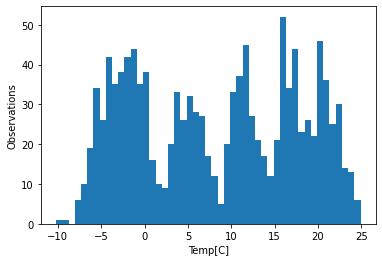

In [34]:
import matplotlib.pyplot as plt

# Open file and filter the last 100 years
df_weather = pd.read_csv('data/Sapporo_Weather.csv',sep=";") 
df_100 = df_weather.loc[df_weather['Year'] >= 1920]

# Plot temperature histogram
plt.hist(df_100['Temp[C]'], 49)
plt.ylabel('Observations')
plt.xlabel('Temp[C]')

The temperature observations made in Saporo in the last 100 years are distributed in 4 groups. These temperatures range from -10ºC to 25ºC, and the existence of the groups is due to the different seasons. The fact that there are some temperatures with less records, is probably due to the presence of months with a temperature of transition between the seasons.


**b)** Show a graph in which the month is on the absciss axis and the temperature on the ordinate axis, with lines of different colors for each year. What do we see now?

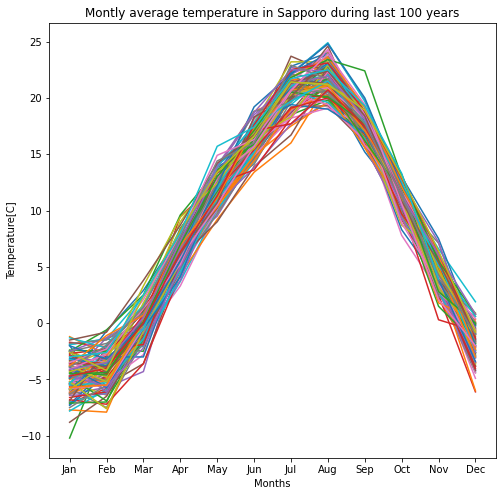

In [36]:
# Create figure
fig, ax = plt.subplots(figsize=(8,8))

# Draw lines in plot for each year
for i in range(1920, 2020):
    year_data = (df_100.loc[df_100['Year'] == i, ['Temp[C]', 'Month']])
    temp = list(year_data['Temp[C]'])
    month = list(year_data['Month'])
    rects1 = plt.plot(month, temp, label=str(i))

# Set labels
ax.set_xlabel('Months')
ax.set_ylabel('Temperature[C]')

plt.title("Montly average temperature in Sapporo during last 100 years")

plt.show()

As can be seen in the graph, Sapporo repeats a similar temperature pattern every year. The minimum is in January and December (-5ºC approx.), and gradually increases to the maximum of August (20ºC approx.), then gradually decreases again until December-January.

**c)** The Olympic Games are held during summer. Could you show the evolution of temperature over the last 100 years in July? Show with another color a regression line using the values of the last 100 years, and a second using those of the last 50 years. Explain what you see.

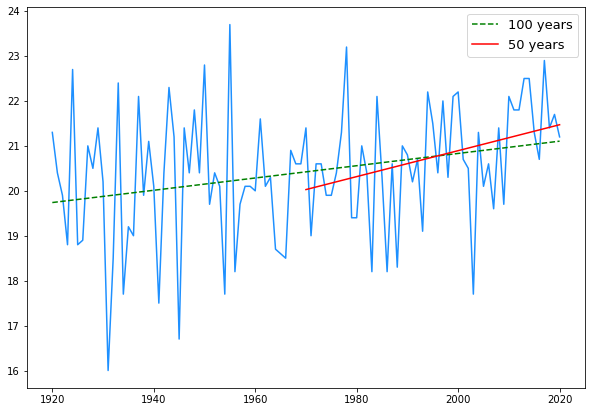

In [20]:
from numpy.polynomial.polynomial import polyfit

# Select data
df_100 = df_100.loc[df_100['Month']=='Jul']
df_50 =  df_100[df_100['Year'] >= 1970]

# Scatter plot
plt.figure(figsize=(10,7))
plt.plot(df_100['Year'], df_100['Temp[C]'], color='dodgerblue')

# Regression line 100 years
b1, m1 = polyfit(df_100['Year'], df_100['Temp[C]'], 1)
plt.plot(df_100['Year'], b1 + m1 * df_100['Year'], '--g', label="100 years")

# Regression line 50 years
b2, m2 = polyfit(df_50['Year'], df_50['Temp[C]'], 1)
plt.plot(df_50['Year'], b2 + m2 * df_50['Year'], 'r', label="50 years")

# Show 
plt.legend(fontsize=13)
plt.show()

If there was no global warming, we would expect to find in both periods, a flat regression line, meaning that the temperature would remain even as the years progressed.

What is shown in this graph is the opposite situation. On the one hand, there is the 100-year regression line which represents an already noticeable increase in temperatures overtime. And on the other hand, in the 50-year regression line this increase in temperature is accentuated as time goes on, even doubling the slope of the first regression line. Therefore, global warming is intensifying.